# Imports

In [1]:
from PIL import Image
import numpy as np
import copy
import cv2 as cv
import os
from scipy.sparse import csr_matrix, hstack
import matplotlib.pyplot as plt
import seaborn as seab
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn import metrics
np.set_printoptions(suppress=True) 

In [149]:
def heatmap(confusionmat,title="Confusion Matrix",title2="",index=0):
    plt.figure()
    ax = plt.axes()
    seab.heatmap(confusionmat,linewidths=0.4,linecolor='white',annot=True,fmt='g') 
    ax.set_title(title + title2)
def getConfusionMat(predicted, actual,classcount):
    confusionmatrix = []
    for i in range (classcount):
        confusionmatrix.append([])
        for j in range (classcount):
            confusionmatrix[i].append(0)
    for i in range(0, len(predicted)):
        confusionmatrix[actual[i]][predicted[i]]+=1
    return confusionmatrix

In [2]:
all_data = pd.read_csv("../Dataset/PS_20174392719_1491204439457_log.csv")

In [3]:
print len(all_data)

6362620


In [4]:
print all_data.keys()
all_data.shape

Index([u'step', u'type', u'amount', u'nameOrig', u'oldbalanceOrg',
       u'newbalanceOrig', u'nameDest', u'oldbalanceDest', u'newbalanceDest',
       u'isFraud', u'isFlaggedFraud'],
      dtype='object')


(6362620, 11)

In [99]:
print all_data.iloc[0,:]
all_data.head()

step                        1
type                  PAYMENT
amount                9839.64
nameOrig          C1231006815
oldbalanceOrg          170136
newbalanceOrig         160296
nameDest          M1979787155
oldbalanceDest              0
newbalanceDest              0
isFraud                     0
isFlaggedFraud              0
Name: 0, dtype: object


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# remove feature isFlagged fraud

In [6]:
new_all_data = pd.DataFrame()
new_all_data = new_all_data.append(all_data.loc[:,['step','type','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFraud']])

In [7]:
print len(new_all_data)

6362620


In [8]:
set(new_all_data.type)

{'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'}

In [9]:
new_filterdata = pd.DataFrame()

In [10]:
new_filterdata = pd.DataFrame()
new_filterdata= new_filterdata.append(new_all_data.loc[new_all_data.loc[:,'type'] == 'TRANSFER',:],ignore_index=True)
len(new_filterdata)
new_filterdata= new_filterdata.append(new_all_data.loc[new_all_data.loc[:,'type'] == 'CASH_OUT',:],ignore_index=True)
len(new_filterdata)
print new_filterdata.keys()

Index([u'step', u'type', u'amount', u'nameOrig', u'oldbalanceOrg',
       u'newbalanceOrig', u'nameDest', u'oldbalanceDest', u'newbalanceDest',
       u'isFraud'],
      dtype='object')


In [11]:
print set(new_filterdata.type)

set(['CASH_OUT', 'TRANSFER'])


In [12]:
new_filterdata.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1
1,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0
2,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0
3,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0
4,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0


In [13]:
copydata = copy.deepcopy(new_filterdata)

In [14]:
copydata.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2770404,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1
2770405,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1
2770406,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
2770407,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
2770408,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


In [15]:
copydata.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1
1,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0
2,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0
3,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0
4,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0


In [16]:
# copydata.reset_index()

In [17]:
copydata.loc[copydata.type == 'TRANSFER', 'type'] = 1
copydata.loc[copydata.type == 'CASH_OUT', 'type'] = 2

In [18]:
copydata.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2770404,742,2,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1
2770405,743,2,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1
2770406,743,2,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
2770407,743,2,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
2770408,743,2,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


In [19]:
print len(set(copydata.nameOrig))
print len(set(copydata.nameDest))

2768630
509565


In [20]:
copydata.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,1,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1
1,1,1,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0
2,1,1,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0
3,1,1,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0
4,1,1,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0


In [21]:
# copy2 = copy.deepcopy(copydata)
# copy2.to_csv("../Dataset/filtereddata_withtypeconverted",index=False)

In [22]:
# copydata = copy.deepcopy(copy2)
unique_nameOrig = set(copydata.nameOrig)
unique_nameDest = set(copydata.nameDest)

In [23]:
print len(set(copydata.nameOrig))
print len(set(copydata.nameDest))

2768630
509565


In [24]:
print len(copydata.nameDest)

2770409


In [25]:
listdata = np.array(copydata)

In [26]:
print listdata[0]

[1 1 181.0 'C1305486145' 181.0 0.0 'C553264065' 0.0 0.0 1]


In [27]:
tmpunique = unique_nameDest.union(unique_nameOrig)
index = 1
tmpdict = {}
for i in range(len(listdata)):
    if(listdata[i][3] in tmpdict):
        listdata[i][3] = tmpdict[listdata[i][3]]
    else:
        tmpdict[listdata[i][3]] = index
        listdata[i][3] = index
        index += 1
    if(listdata[i][6] in tmpdict):
        listdata[i][6] = tmpdict[listdata[i][6]]
    else:
        tmpdict[listdata[i][6]] = index
        listdata[i][6] = index
        index += 1

In [28]:
print listdata[0]

[1 1 181.0 1 181.0 0.0 2 0.0 0.0 1]


In [29]:
newdataframe = pd.DataFrame(listdata,columns=copydata.keys())

In [30]:
# newdataframe

In [54]:
# newdataframe.to_csv("../Dataset/completepreprocesseddata.csv",index=False)

In [141]:
train_data = newdataframe.loc[:,['step','type','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest']]

In [142]:
train_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,1,181,1,181,0,2,0,0
1,1,1,215310,3,705,0,4,22425,0
2,1,1,311686,5,10835,0,6,6267,2.71917e+06
3,1,1,62610.8,7,79114,16503.2,8,517,8383.29
4,1,1,42712.4,9,10363.4,0,10,57901.7,24044.2


In [143]:
train_labels = newdataframe.loc[:,['isFraud']]

In [144]:
train_labels.head()

,isFraud
0,1
1,0
2,0
3,0
4,0


In [145]:
# train_data.to_csv("../Dataset/train_data.csv",index=False)
# train_labels.to_csv("../Dataset/train_labels.csv",index=False)

In [146]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [147]:
# clf = SVC(gamma='auto')
clf = GaussianNB()
clf.fit(np.array(train_data),np.array(train_labels).astype(int))

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy on Train Data: 0.9847924981473855


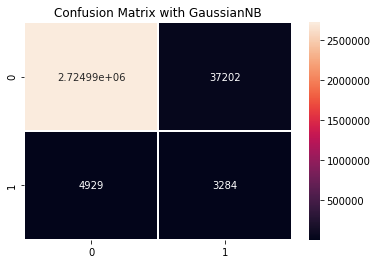

In [156]:
y = clf.predict(np.array(train_data))
print "Accuracy on Train Data: " +str( accuracy_score(y,np.array(train_labels).astype(int)))
heatmap(getConfusionMat(predicted=y,actual=np.array(train_labels.isFraud).astype(int),classcount=2),title2=" with GaussianNB")

In [65]:
print "Count of Non Fraud Transactions: " +str(list(np.array(train_labels).astype(int)).count(0))

Count of Non Fraud Transactions: 2762196


In [61]:
print "Count of Fraud Transactions: " +str(list(np.array(train_labels).astype(int)).count(1))

Count of Fraud Transactions: 8213


In [67]:
print "Percentage of Non Fraud Transactions: " +str(list(np.array(train_labels).astype(int)).count(0)/float(len(train_labels)) * 100)
print "Percentage of Fraud Transactions: " +str(list(np.array(train_labels).astype(int)).count(1)/float(len(train_labels)) * 100)

Percentage of Non Fraud Transactions: 99.7035455776
Percentage of Fraud Transactions: 0.296454422434


In [58]:
#Transfer
dfFraudTransfer = newdataframe.loc[(newdataframe.isFraud == 1) & (newdataframe.type == 1)]
#Cashout
dfFraudCashout = newdataframe.loc[(newdataframe.isFraud == 1) & (newdataframe.type == 2)]

print ('\n Fraudulent TRANSFER count = '+str(len(dfFraudTransfer))) # 4097

print ('\n Fraudulent CASH_OUT count= '+str(len(dfFraudCashout))) 


 Fraudulent TRANSFER count = 4097

 Fraudulent CASH_OUT count= 4116


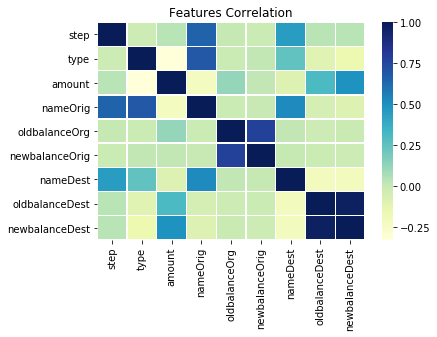

In [97]:
corr = train_data.astype(float).corr()
ax = plt.axes()
ax.set_title("Features Correlation")
seab.heatmap(corr,linewidths=0.4,linecolor='white',annot=False,cmap ="YlGnBu",)

In [108]:
from sklearn import metrics
probabiloties = clf.predict_proba(np.array(train_labels).astype(int))
mett=metrics.classification_report(np.array(train_labels.isFraud).astype(int),y)
print mett
p,r,t = metrics.precision_recall_curve(probas_pred=probabiloties[:,0],y_true=np.array(train_labels.isFraud).astype(int))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2762196
           1       0.00      0.00      0.00      8213

   micro avg       1.00      1.00      1.00   2770409
   macro avg       0.50      0.50      0.50   2770409
weighted avg       0.99      1.00      1.00   2770409



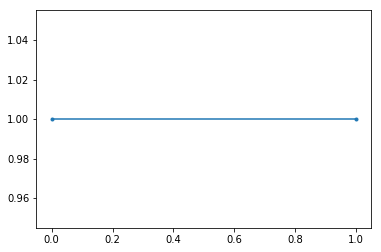

In [109]:
plt.plot(r, p, marker='.')

In [122]:
train_data = np.array(train_data)
train_labels = np.array(train_labels).astype(int)

In [123]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)
trainX, testX, trainY, testY = train_test_split(train_data, train_labels, test_size = 0.2)

In [157]:
# clf = SVC(gamma='auto')
clf = GaussianNB()
clf.fit(trainX,trainY)

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy on Train Data: 0.9845149273934183


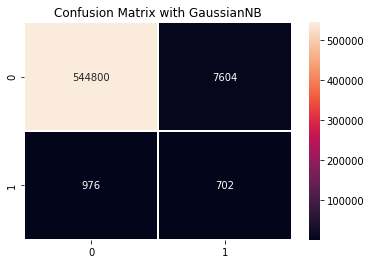

In [160]:
y = clf.predict(testX)
print "Accuracy on Train Data: " +str( accuracy_score(y_true=testY,y_pred=y))
heatmap(getConfusionMat(predicted=y,actual=testY.flatten(),classcount=2),title2=" with GaussianNB")

In [134]:
print testY.shape

(554082, 1)


In [135]:
print y.shape

(554082,)
